# Classifying Electrocardiograms

## (1) Electrocardiograms

👇 Import the [`electrocardiograms.csv`](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv) dataset and display its first 5 rows

In [1]:
import pandas as pd
#pd.set_option("display.max_columns", None)

data = pd.read_csv('/Users/Laetitia/code/juliensoudet/05-ML/03-Performance-metrics/data-electrocardiograms/data/ML_Electrocardiograms_dataset.csv')

data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


In [2]:
data.shape


(19565, 188)

💓 Each observation of the dataset is a sequence of measured heartbeats, taken from a patient's electrocardiogram (ECG).

🎯 The target is binary and defines whether the heartbeat shows:
* a risk of cardiovascular disease 🔴 (1)
* or not 🟢 (0)

## (2) Data Exploration

❓ **Question** ❓

Plot an observation of each target class to get a visual idea of what the numbers represent.

In [3]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

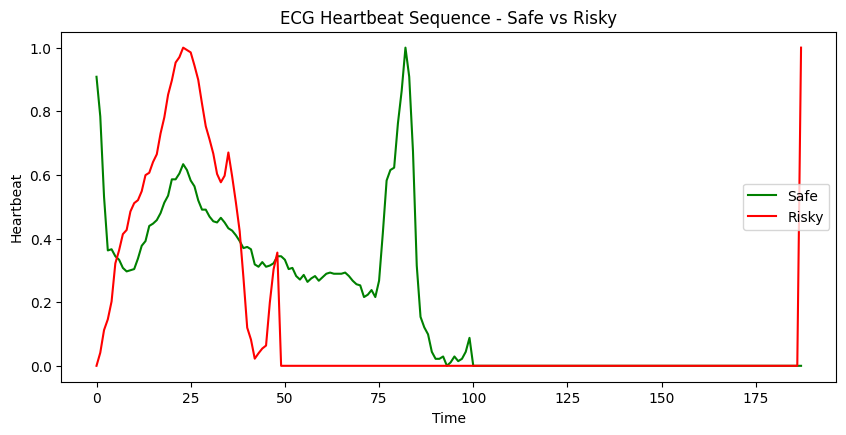

In [4]:


# Separate observations based on target
data1 = data[data['target'] == 0].iloc[0] 
data2 = data[data['target'] == 1].iloc[0] 

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)  
plt.plot(data1.values, label='Safe', color='green')
plt.plot(data2.values, label='Risky', color='red')
plt.title('ECG Heartbeat Sequence - Safe vs Risky')
plt.xlabel('Time')
plt.ylabel('Heartbeat')
plt.legend()


plt.show()


❓ **Questions** ❓

* How many observations of at-risk heartbeats are there? Save your answer as `at_risk_count`.

In [5]:
# YOUR CODE HERE
data['target']. value_counts()
at_risk_count = 1448

* How many observations of healthy heartbeats are there? Save your answer as `healthy_count`.

In [6]:
# YOUR CODE HERE
healthy_count = 18117

👩🏻‍🏫 In certain cases, the class balance is representative of the true class distribution. This is the case here: the vast majority of people actually have healthy hearts. In such case, we preserve the class distribution to train the model based on reality, and adapt our modeling approach accordingly.

[Centers for Disease Control and Prevention - Heart Disease Facts](https://www.cdc.gov/heartdisease/facts.htm)

🧪 **Check your code**

In [7]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/03-Performance-metrics/data-electrocardiograms/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_class_balance.py::TestClass_balance::test_at_risk_count PASSED      [ 50%]
test_class_balance.py::TestClass_balance::test_healthy_count PASSED      [100%]

============================== 2 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/class_balance.pickle

git commit -m 'Completed class_balance step'

git push origin master



In [8]:
! git add tests/class_balance.pickle

! git commit -m 'Completed class_balance step'

! git push origin master


On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Electrocardiograms.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	tests/precision.pickle
	tests/prediction.pickle

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


##  (3) Logistic Regression

🎯 Your task is to **flag heartbeats that are at risk of cardiovascular diseases.**

👇 Let's start by investigating the performance of a `LogisticRegression` on that task. Use a ***cross-validation to evaluate the model*** on the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [9]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X = data.drop(columns=['target'])  
y = data['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

cv_scores_accuracy = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='f1')

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print ("Accuracy :", accuracy)
print ("Precision :", precision)
print ("recall :", recall)
print ("f1 :", f1)



/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

Accuracy : 0.9395229982964225
Precision : 0.6276150627615062
recall : 0.3605769230769231
f1 : 0.45801526717557245


/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


❓ **Question (Ratio of correct predictions)** ❓ 

What is the ratio of correct predictions for this model ? Save your answer under variable name `correct_pred_ratio`.

In [11]:
# YOUR CODE HERE
correct_pred_ratio = accuracy
correct_pred_ratio

0.9395229982964225

❓ **Question (Ability to flag at-risk patients)** ❓ 

What percentage of at-risk heartbeats is the model able to flag? Save your answer under variable name `flag_ratio`.

In [12]:
# YOUR CODE HERE
flag_ratio = recall
flag_ratio

0.3605769230769231

❓ **Question (Ability to flag correctly)** ❓ 

When the model signals an at-risk heartbeat, how often is it correct? Save your answer under variable name `correct_detection_ratio`.

In [13]:
# YOUR CODE HERE
correct_detection_ratio = precision
correct_detection_ratio

0.6276150627615062

❓ **Question (Detecting as many at-risk patients as possible without too many false alarms)** ❓ 

What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?  Save your answer under variable name `aggregated_metric`.

In [14]:
# YOUR CODE HERE
aggregated_metric = f1
aggregated_metric

0.45801526717557245

🧪 **Check your code**

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/03-Performance-metrics/data-electrocardiograms/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_accuracy PASSED [ 25%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_f1 PASSED [ 50%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_precision PASSED [ 75%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_recall PASSED [100%]

============================== 4 passed in 0.96s ===============================


💯 You can commit your code:

git add tests/logistic_regression_evaluation

In [16]:
! git add tests/logistic_regression_evaluation.pickle

! git commit -m 'Completed logistic_regression_evaluation step'

! git push origin master


On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Electrocardiograms.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	tests/precision.pickle
	tests/prediction.pickle

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


▶️ Run the following cell before moving on:

In [17]:
print(f"You should have noticed that the model was able to predict correctly in {int(round(correct_pred_ratio,2)*100)} cases out of 100. ")

print(f"However, it was able to capture only {round(flag_ratio,2)*100} % of the at-risk patients")

print("Why ? Let's print a confusion matrix!")


You should have noticed that the model was able to predict correctly in 94 cases out of 100. 
However, it was able to capture only 36.0 % of the at-risk patients
Why ? Let's print a confusion matrix!


## (4) Confusion Matrix

👇 Using `ConfusionMatrixDisplay` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)),  visualize the predictions breakdown of the Logistic Regression model.

<details>
<summary>💡 Hints</summary>

    
1. [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)    
2. [from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions)
    
- Don't forget to to go back to the **Holdout method** to [`train-test-split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) your dataset and look at the confusion matrix on the test set.  
</details>



In [18]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

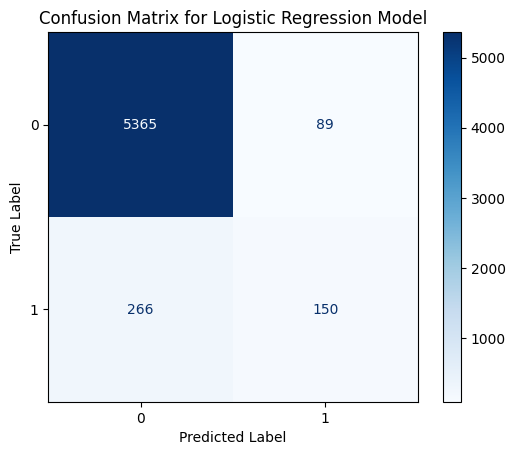

In [19]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

ℹ️ The confusion matrix should show that the model is influenced by the class imbalance: it predicts the heartbeats to be healthy most of the time. Due to this behaviour, the model is often correct and has a **high accuracy**. However, this also causes it to miss out on many at-risk heartbeats: it has **bad recall**...

👉 This model is therefore poor at the task of **flagging at-risk observations**.

❗️ Don't be fooled by the accuracy and look at the metric that corresponds to your task! ❗️

## (5) KNN Classifier

❓ **Question (Classification Model Selection)** ❓ 

Would a default KNN classifier perform better at the task of flagging at-risk observations?

Save the you answer under `best_model` as "KNN" or "LogisticRegression".

In [20]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()

cv_scores_accuracy_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
cv_scores_precision_knn = cross_val_score(knn, X, y, cv=5, scoring='precision').mean()
cv_scores_recall_knn = cross_val_score(knn,X, y, cv=5, scoring='recall').mean()
cv_scores_f1_knn = cross_val_score(knn, X, y, cv=5, scoring='f1').mean()

print ("accuracy", cv_scores_accuracy_knn)
print("precision",cv_scores_precision_knn )
print('recall', cv_scores_recall_knn)
print('f1', cv_scores_f1_knn)

accuracy 0.9854331714796831
precision 0.9403030439629824
recall 0.8577210356759336
f1 0.8970183275075831


💪 For this ECG dataset, the KNN Classifier should have a much higher recall than the LogisticRegression and therefore is better suited for the task.

In [22]:
best_model = "KNN"

🧪 **Check your code**

In [23]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/03-Performance-metrics/data-electrocardiograms/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



In [24]:
! git add tests/best_model.pickle

! git commit -m 'Completed best_model step'

! git push origin master



On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Electrocardiograms.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	tests/precision.pickle
	tests/prediction.pickle

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


## (6) Classification Report

Now that we have selected the KNN model thanks to its higherbest recall, let's have a look at the other classification performance metrics>

❓ **Question (Classification Report)** ❓

Print out a [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) of the KNN model.

<details>
    <summary> 💡 <i>Hint</i>  </summary>
    
* You will need to pass the predictions of the model to a `classification_report`.
    
* SkLearn's [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) might help 😉
</details>




In [34]:
# YOUR CODE HERE
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

In [38]:
X = data.drop(columns=['target'])  
y = data['target'] 

knn = KNeighborsClassifier()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_pred = cross_val_predict(knn, X_scaled, y, cv=5)

report = classification_report(y, y_pred, output_dict=True)
report

{'0': {'precision': 0.9862106703146375,
  'recall': 0.9948115030082243,
  'f1-score': 0.9904924159155859,
  'support': 18117.0},
 '1': {'precision': 0.9271317829457364,
  'recall': 0.8259668508287292,
  'f1-score': 0.8736303871439005,
  'support': 1448.0},
 'accuracy': 0.9823153590595451,
 'macro avg': {'precision': 0.9566712266301869,
  'recall': 0.9103891769184768,
  'f1-score': 0.9320614015297433,
  'support': 19565.0},
 'weighted avg': {'precision': 0.9818382589213245,
  'recall': 0.9823153590595451,
  'f1-score': 0.9818434909137252,
  'support': 19565.0}}

In [40]:
report_df = pd.DataFrame(report)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.986211,0.927132,0.982315,0.956671,0.981838
recall,0.994812,0.825967,0.982315,0.910389,0.982315
f1-score,0.990492,0.873630,0.982315,0.932061,0.981843
support,18117.000000,1448.000000,0.982315,19565.000000,19565.000000


❓ **Question (Reading the report)** ❓


Among the heartbeats predicted at-risk, what is the ratio of correct predictions ? 

In mathematical terms, can you read the ratio $ \frac{TP}{TP + FP} $ in the report? What is the name of this classification metrics ? 

Save your answer as a float under `correct_at_risk_predictions`

In [41]:
# YOUR CODE HERE

correct_at_risk_predictions = 0.927132

🧪 **Check your code**

In [42]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_at_risk_predictions)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/03-Performance-metrics/data-electrocardiograms/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_precision.py::TestPrecision::test_precision PASSED                  [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/precision.pickle

git commit -m 'Completed precision step'

git push origin master



In [43]:
! git add tests/precision.pickle

! git commit -m 'Completed precision step'

! git push origin master


[master 042b605] Completed precision step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/precision.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 427 bytes | 427.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-electrocardiograms.git
   2f44867..042b605  master -> master


## (7) Prediction

❓ **Question (Predicting)** ❓

A patient comes to you for a second opinion because  he was told that based on his heartbeats, this patient may be at-risk.  

According to your optimal model, is he at-risk or not?  

Save the prediction of your model under variable name `prediction` as "at risk" or "healthy".

In [30]:
new_patient = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_new_patient.csv')
new_patient

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


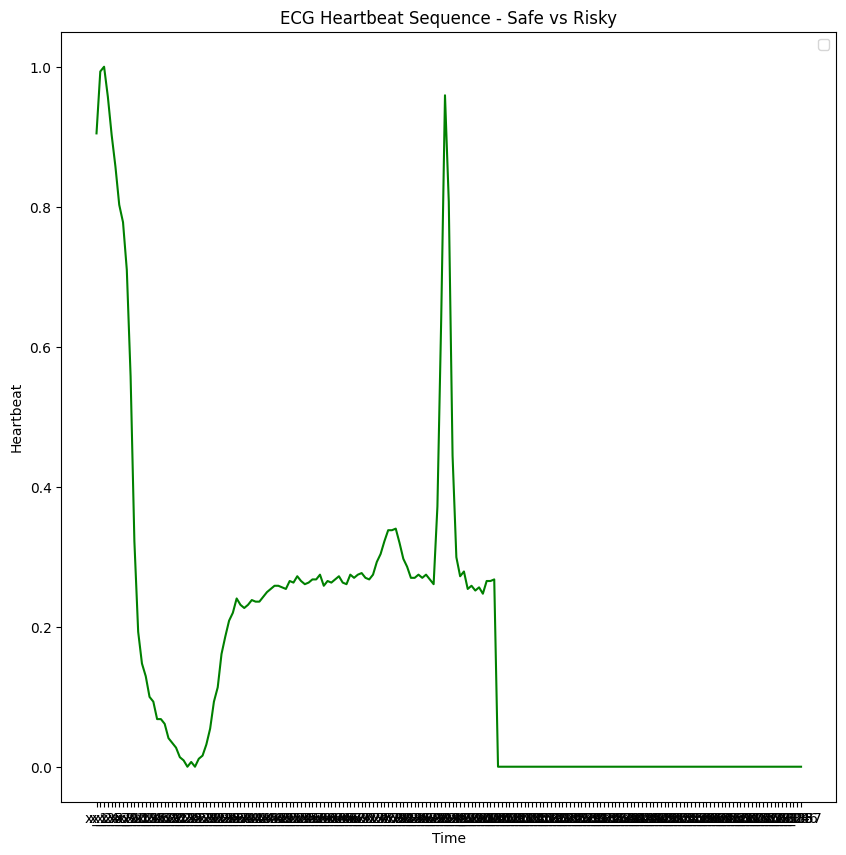

In [51]:

plt.figure(figsize=(10, 10))
 
plt.plot(new_patient.iloc[0], color='green')

plt.title('ECG Heartbeat Sequence - Safe vs Risky')
plt.xlabel('Time')
plt.ylabel('Heartbeat')
plt.legend()
plt.show()


In [45]:
# YOUR CODE HERE
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

X = new_patient
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

prediction = clf.predict(X_scaled)

prediction



/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [32]:
prediction = "healthy"

🧪 **Check your code**

In [52]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/03-Performance-metrics/data-electrocardiograms/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction_at_risk FAILED       [100%]

=================================== FAILURES ===================================
____________________ TestPrediction.test_prediction_at_risk ____________________

self = <tests.test_prediction.TestPrediction testMethod=test_prediction_at_risk>

    def test_prediction_at_risk(self):
>       self.assertEqual(self.result.prediction,  "at risk")
E       AssertionError: array([0]) != 'at risk'

test_prediction.py:6: AssertionError
=============================== warnings summary ======

**LOOKS LIKE, WHILE PLOTTING AS HEALTHY, WHAT I FOUND. ERROR?**

In [53]:
! git add tests/prediction.pickle

! git commit -m 'Completed prediction step'

! git push origin master

[master 1a4f3f4] Completed prediction step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/prediction.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 529 bytes | 529.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-electrocardiograms.git
   042b605..1a4f3f4  master -> master


🏁 Congratulations!

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!